# Display Neighborhoods with population

### Imports

In [15]:
import pandas as pd
import numpy as np
import requests
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim 


### Data Collection

In [2]:
# load data
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [3]:
neighborhoods_data = newyork_data['features']

In [4]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the DataFrame
neighborhoods = pd.DataFrame(columns=column_names)

# display empty DataFrame
neighborhoods

,Neighborhood,Latitude,Longitude


In [7]:
# fill DataFrame
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    
    if borough == 'Manhattan':
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

### Display Neighborhoods

In [16]:
# get the location of New York
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {},{}.'.format(latitude, longitude))

# create a map of New York
map_newyork = folium.Map(location=[latitude,longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  

# output map
map_newyork

The geograpical coordinate of New York City are 40.7127281,-74.0060152.


### create borders

In [51]:
# get polygon of neighborhoods 
# (using https://polygons.openstreetmap.fr/ and https://www.openstreetmap.org/export#map=11/40.7745/-73.9778)

# ATTENTION: only get exemplary for one neighborhood
data = pd.read_json(r'C:\Users\maren\OneDrive\Dokumente\Uni_Mannheim\MASTER\FSS 2022\Teamprojekt\ines-autonomous-dispatching\get_geojson.py')
data

,type,geometries
0,GeometryCollection,"{'type': 'MultiPolygon', 'coordinates': [[[[-7..."


In [53]:
# get column 'geometries'
x = data['geometries']
# get the dictionary of coordinates of the polygon
dict = x[0]

In [62]:
# get the coordinates from the dictionary
border = dict['coordinates'][0][0]
border

[[-73.9730268, 40.7642759],
 [-73.9729067, 40.764222],
 [-73.9722754, 40.7639571],
 [-73.971527, 40.7636402],
 [-73.9714153, 40.7635968],
 [-73.9713089, 40.7635501],
 [-73.971097, 40.7634604],
 [-73.9700062, 40.7630019],
 [-73.9699061, 40.7629603],
 [-73.969682, 40.7628745],
 [-73.9695864, 40.7628341],
 [-73.9694157, 40.7627622],
 [-73.9681649, 40.7622342],
 [-73.9679663, 40.762151],
 [-73.9673212, 40.7618789],
 [-73.9667085, 40.7616129],
 [-73.966589, 40.7615618],
 [-73.9662251, 40.7614166],
 [-73.9648675, 40.760844],
 [-73.9609164, 40.7591777],
 [-73.9598396, 40.7587236],
 [-73.9597228, 40.7586736],
 [-73.9595963, 40.758621],
 [-73.9590325, 40.7583833],
 [-73.9586782, 40.7582632],
 [-73.9585154, 40.7581976],
 [-73.9579868, 40.7587776],
 [-73.9592658, 40.7593001],
 [-73.9593942, 40.7593525],
 [-73.959455, 40.759377],
 [-73.961368, 40.7601958],
 [-73.9615014, 40.7602517],
 [-73.9616091, 40.7602969],
 [-73.9616496, 40.7603139],
 [-73.9620166, 40.7604678],
 [-73.9624601, 40.7606539],
 [-

In [76]:
# display points
#Define coordinates of where we want to center our map
boulder_coords = [40.754932, -73.984016]
#Create the map
m = folium.Map(location = boulder_coords, tiles="cartodbpositron", zoom_start = 13)

for i in range(len(border)):
    folium.Marker(location=[border[i][1],border[i][0]],popup="x").add_to(m)
m

In [78]:
url =("https://polygons.openstreetmap.fr/")
edge = f"{url}/get_geojson.py?id=8398088&params=0"
folium.GeoJson(edge, name="geojson").add_to(m)

#folium.TopoJson(
#    json.loads(requests.get(antarctic_ice_shelf_topo).text),
#    "objects.antarctic_ice_shelf",
#    name="topojson",
#).add_to(m)

folium.LayerControl().add_to(m)
m

### Data about Population

In [28]:
# load file with data
population = pd.read_csv(r'C:\Users\maren\OneDrive\Dokumente\Uni_Mannheim\MASTER\FSS 2022\Teamprojekt\ines-autonomous-dispatching\New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv')

# filter out irrelevant data (only rows with Borough "Manhattan" relevant, only must current values)
indexNames = population[population['Borough']!="Manhattan"].index
population.drop(indexNames,inplace=True)
indexNames2 = population[population['Year']==2000].index
population.drop(indexNames2,inplace=True)

# filter out irrelevant columns (all but NTA Code, NTA Name and Population)

# display DataFrame
population

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
284,Manhattan,2010,61,MN01,Marble Hill-Inwood,46746
285,Manhattan,2010,61,MN03,Central Harlem North-Polo Grounds,75282
286,Manhattan,2010,61,MN04,Hamilton Heights,48520
288,Manhattan,2010,61,MN06,Manhattanville,22950
289,Manhattan,2010,61,MN09,Morningside Heights,55929
290,Manhattan,2010,61,MN11,Central Harlem South,43383
291,Manhattan,2010,61,MN12,Upper West Side,132378
292,Manhattan,2010,61,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,70150
293,Manhattan,2010,61,MN14,Lincoln Square,61489
294,Manhattan,2010,61,MN15,Clinton,45884


In [ ]:
# testing


### Dstribution of Population per Neighborhood

In [ ]:
# generate equally distributed points in each neighborhood
#for neighborh in population:
    

In [ ]:
# display points on map

In [ ]:
# assign each point to its neighborhood

### Clustering of Population

In [ ]:
# kmeans on the populationn

In [ ]:
# DBSCAN on population

### Comparison to Data of Statistical Atlas
(https://statisticalatlas.com/county-subdivision/New-York/New-York-County/Manhattan/Population)

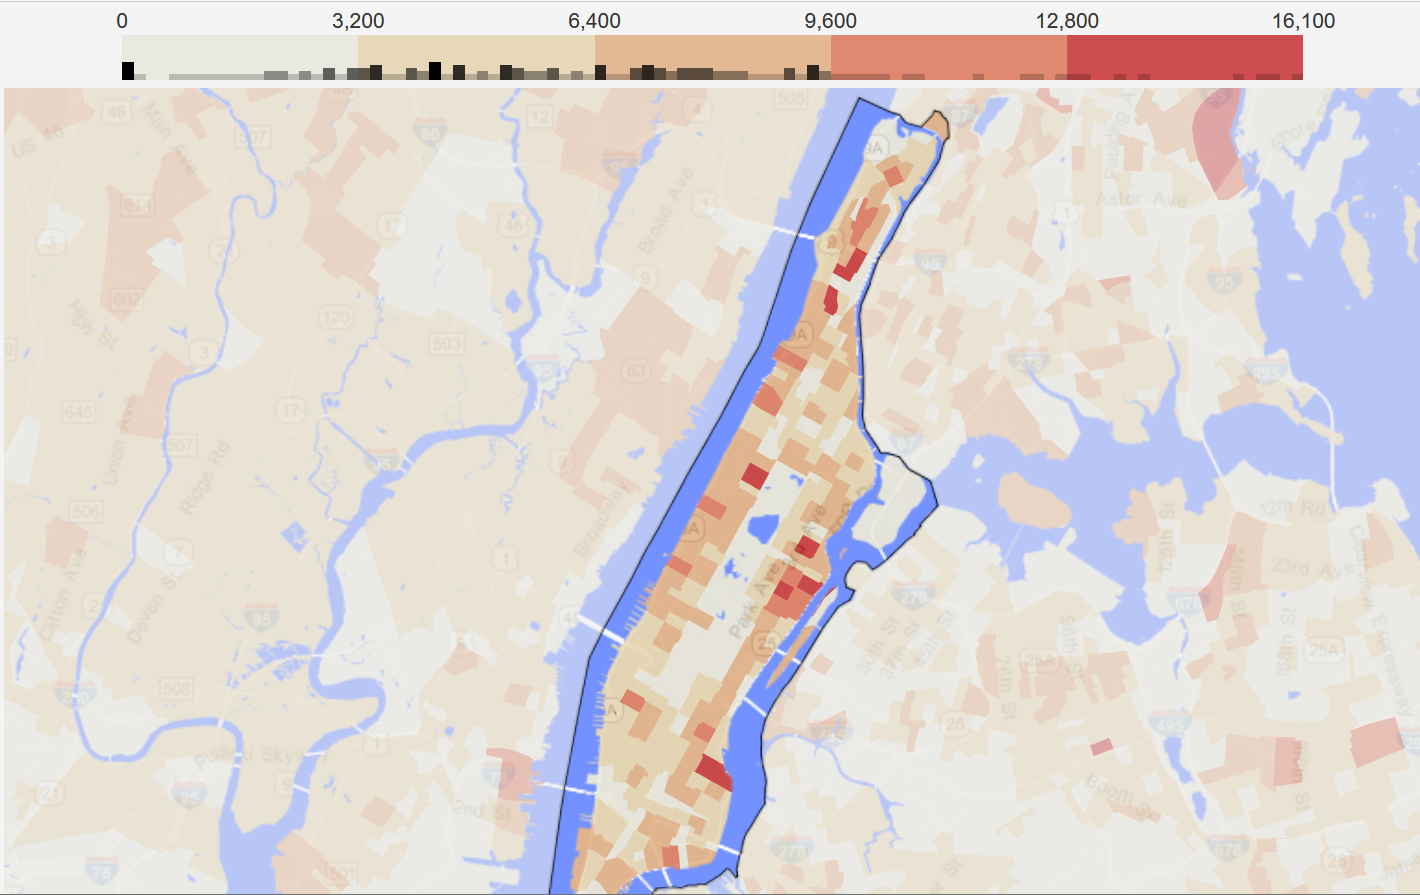

In [19]:
from IPython.display import Image
Image(r"C:\Users\maren\OneDrive\Dokumente\Uni_Mannheim\MASTER\FSS 2022\Teamprojekt\picture_for_comparison.png")

### Comparison to Data of ArcGis
(https://www.arcgis.com/apps/mapviewer/index.html?webmap=80f9b95a4ce0491091f1477710f6a91d)

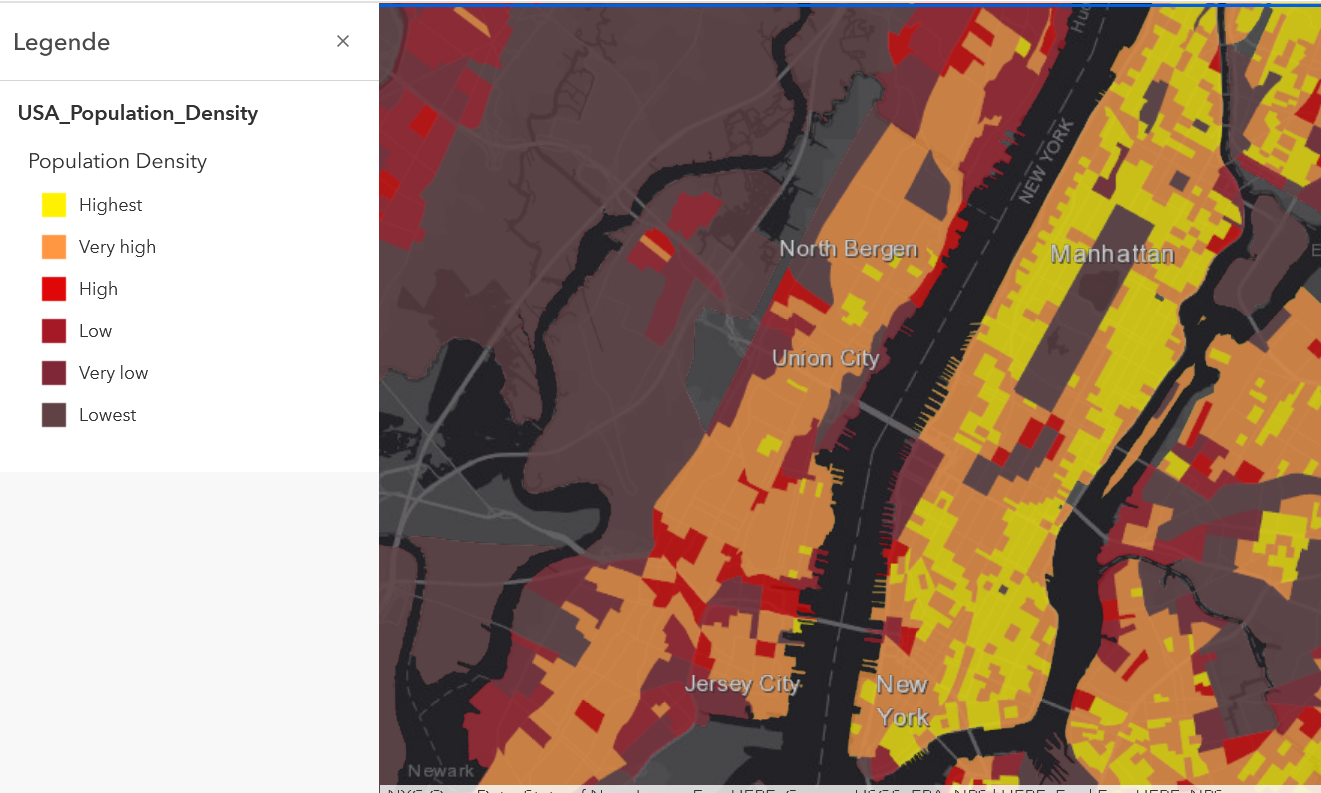

In [29]:
from IPython.display import Image
Image(r"C:\Users\maren\OneDrive\Dokumente\Uni_Mannheim\MASTER\FSS 2022\Teamprojekt\picture2_for_comparison.png")

# Display Stores

In [ ]:
# import data from other file
# display stores
# transform data into appropriate format for merging

# Get all target points: merge population and stores

# Clustering / Density Analysis